In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import io
%cd "D:\Projects\Future Today"


D:\Projects\Future Today


In [3]:
df=pd.read_excel(r"Dummy data analysis for recruitment_Aug 2022.xlsx")

In [4]:
pd.set_option('display.max_rows', None)

1. Go through the file and also check ifood channel lineup on link https://freeawesometv.com/?iptv=true&siteId=1&platform_id=1217563&testCountry=US  . Note that this is just a way to look at channel lineup, and not a site for users, hence it is not optimised for PC. You will need to use your keyboard buttons for scrolling on this site,  mouse will not work. 
2. Compare the performance data on file, and the L2 categories on channel. Is there any particular re-ordering of L2 rows which will result in better watch time? What is the logic used? ( L2 is basically every row's name. So "Food in Movies", "Top Shows" are all L2s. Some L2s have videos in the list, others have shows. You will figure out if you look at data and then simultaneuously compare it to the channel URL)
3. Within "Top Shows" and "Popular food shows", how will you rearrange the shows based on Watchtime?
4. What other data points / information is needed to ensure that this data analysis can be optimised?
5. Let's assume that whatever suggestions you provide are implemented. How will you check whether the revised lineup is performing better or not? What are the various factors you will check and compare, say after a week?
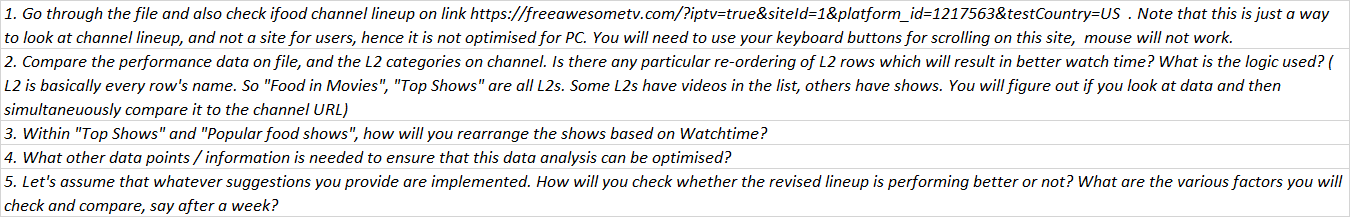

In [5]:
df.head()

,Date,Channel,L1 Category,L2 Category,Play List,Action PlayList,Playlist Duration,Unique Users,Views,Watch Time
0,2022-07-31,iFood.tv,Home,Top Shows,Positively Paula,Positively Paula S01,15925,756,300,2504079
1,2022-07-31,iFood.tv,Home,Popular Food Shows,Copykat Recipes,New Arrivals From Stephanie Manley,94977,273,247,408213
2,2022-07-31,iFood.tv,Home,Explore Latest Recipes,NaN,NaN,0,455,184,294894
3,2022-07-31,iFood.tv,Home,Most Popular Picks,NaN,NaN,93761,756,181,696735
4,2022-07-31,iFood.tv,Home,Popular Food Shows,The Food Channel,New Arrivals From The Food Channel,17150,91,158,109260


In [6]:
df["L2 Category"].value_counts()

Popular Food Shows             2162
Top Shows                      1529
Discover                        753
Recipes A-Z                     354
Food n Travel                   139
Weekend Cooking                 136
Family Food Challenges           44
One-Pot Meals                    40
Food In Movies                   34
Comfort Foods                    32
Spring Recipes                   30
Easy Grilled Recipes             29
Most Popular Picks               27
Turkey Recipes                   27
Explore Latest Recipes           27
Egg-cellent Recipes              27
Casseroles                       27
Better Breakfast                 27
Cake Treats                      27
Desserts                         27
Chicken Favorites                27
Flavors Around The World         27
Crazy Taste Tests                27
Beef Recipes                     27
Slow Cooker Recipes              25
Chocolate Recipes                24
Seafood Time                     24
Weeknight Meal Ideas        

In [7]:
##2. Compare the performance data on file, and the L2 categories on channel.
## Is there any particular re-ordering of L2 rows which will result in better watch time?
#What is the logic used? ( L2 is basically every row's name. So "Food in Movies", "Top Shows" are all L2s. Some L2s have videos in the list, others have shows. 
##You will figure out if you look at data and then simultaneuously compare it to the channel URL)


In [31]:
df["Watch Time"].groupby(df["L2 Category"]).mean().sort_values(ascending=False)
#Avg Watch time of  L2 categories.
#Answer-On the basis of better avg watch time we can reorder L2 Categories like below
#Food In Movies will come on top then most popular picks and so on..

L2 Category
Food In Movies                 502949.911765
Most Popular Picks             348295.000000
Explore Latest Recipes         153605.000000
Crazy Taste Tests              110468.666667
Casseroles                      96125.333333
Better Breakfast                76324.333333
Top Shows                       61893.900589
Egg-cellent Recipes             43706.000000
Chicken Favorites               35731.333333
Cranberry Recipes               33465.857143
Flavors Around The World        31104.000000
Delicious Dips                  31065.652174
Weeknight Meal Ideas            31044.375000
Desserts                        27626.666667
Easy Grilled Recipes            25371.620690
Crafty Cocktails                20802.272727
Chocolate Recipes               19557.375000
Slow Cooker Recipes             17733.240000
Turkey Recipes                  17174.666667
Popular Food Shows              13513.100370
Appetizers                      12931.714286
Seafood Time                    12007.12500

<AxesSubplot:xlabel='L2 Category'>

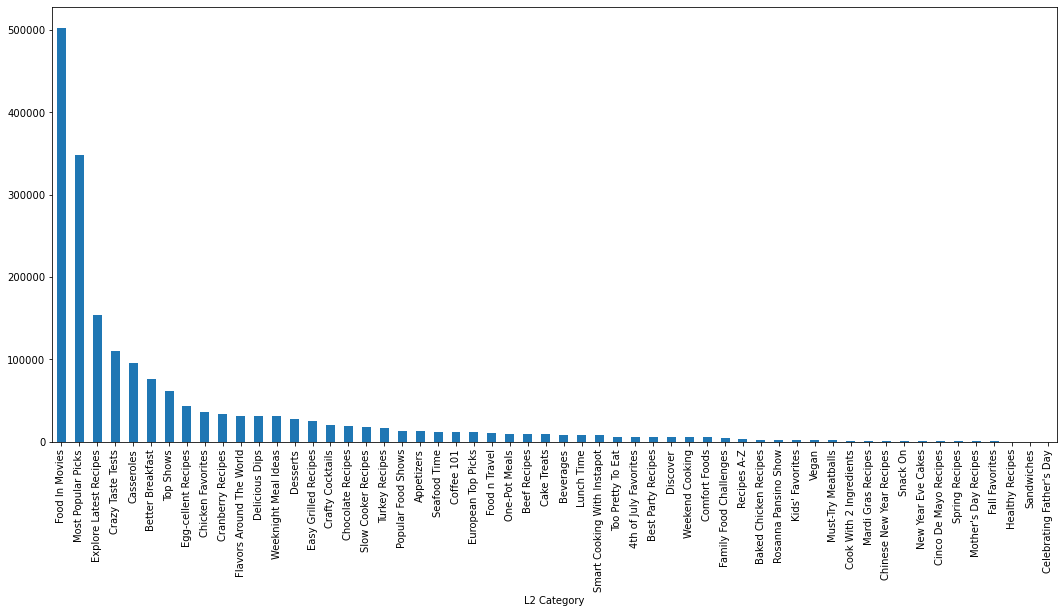

In [9]:
plt.figure(figsize=(18,8))
df["Watch Time"].groupby(df["L2 Category"]).mean().sort_values(ascending=False).plot(kind="bar")

In [10]:
#3. Within "Top Shows" and "Popular food shows", how will you rearrange the shows based on Watchtime?


In [11]:
topshows=df[df["L2 Category"]=="Top Shows"][["Play List","Action PlayList","Watch Time"]]

In [12]:
topshows["Watch Time"].groupby(df["Play List"]).mean().sort_values(ascending=False)
        

Play List
Positively Paula                              678602.000000
Pati's Mexican Table                          250453.500000
Michael Chiarello's Napa                      183454.333333
Hot Mess Express                              118806.000000
Ciao Italia                                   116240.635514
A Taste of History                             79623.692308
The Old Cookbook Show                          77661.666667
Foodie Road Trip                               75302.666667
Martin Yan's China                             72161.000000
Julia & Jacques Cooking at Home                70562.333333
Top Down Challenge                             69247.500000
Top 10                                         61428.000000
Ainsleys Mediterranean Cookbook                37390.153846
Eat Yourself Sexy                              33452.333333
Gordon Ramsay's Ultimate Seasonal Specials     33117.666667
Nick Stellino Storyteller In The Kitchen       32233.666667
Sugar                         

<AxesSubplot:xlabel='Play List'>

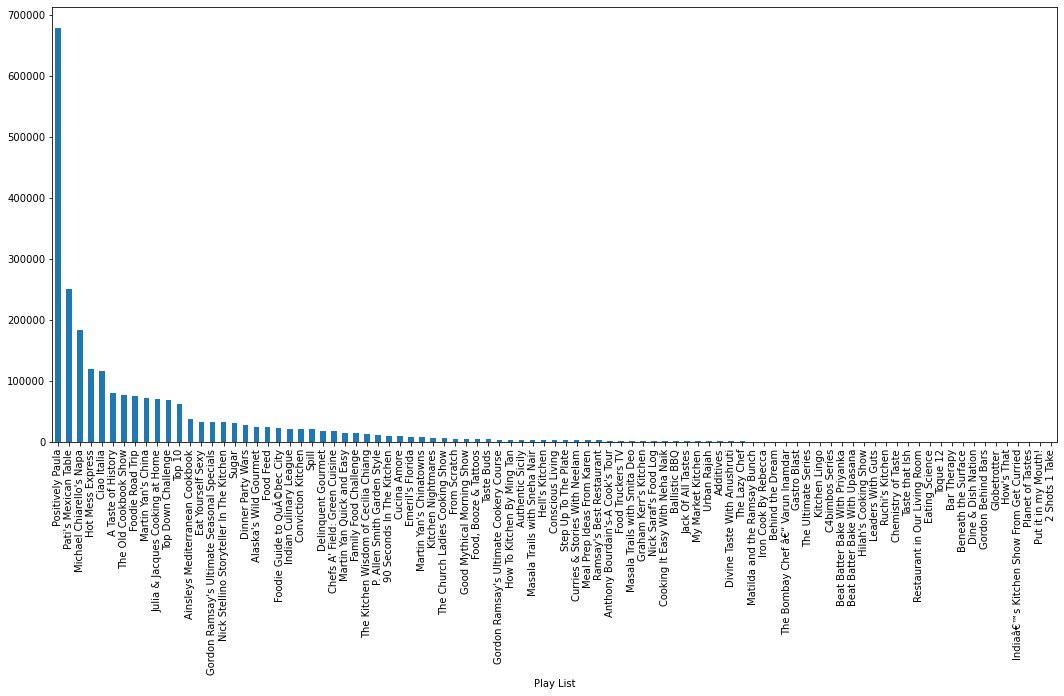

In [23]:
plt.figure(figsize=(18,8))
topshows["Watch Time"].groupby(df["Play List"]).mean().sort_values(ascending=False).plot(kind="bar")
#within topshows Positively paula is the most watched show then pati's mexican table and so on..

In [20]:
popular_food_shows=df[df["L2 Category"]== "Popular Food Shows"][["Play List","Action PlayList","Watch Time"]]

In [21]:
popular_food_shows["Watch Time"].groupby(df["Play List"]).mean().sort_values(ascending=False)

Play List
Cooking With Carolyn              43669.645161
Rosanna Pansino                   23556.600000
Simply Recipes                    18055.698113
Copykat Recipes                   16443.509852
The Food Channel                  14458.736842
Spy Ninjas                        13974.428571
Low Carb 360                      11097.450000
Glen And Friends Cooking           8573.806452
0815BBQ                            8116.312500
Cakes By Choppa                    7790.400000
Rajshri Food                       7769.700000
Click Network                      6909.000000
Gooseberry Patch                   6774.115385
Hilah cooking                      6168.705882
The Wild Adventure Girls           5922.000000
Smoky Ribs                         5615.250000
Dude Food                          5148.000000
Get Out And Grill!                 4386.681818
Fifteen Spatulas                   3995.162791
Ballistic BBQ                      3881.302326
Amateur Kitchen                    3513.521739
One

<AxesSubplot:xlabel='Play List'>

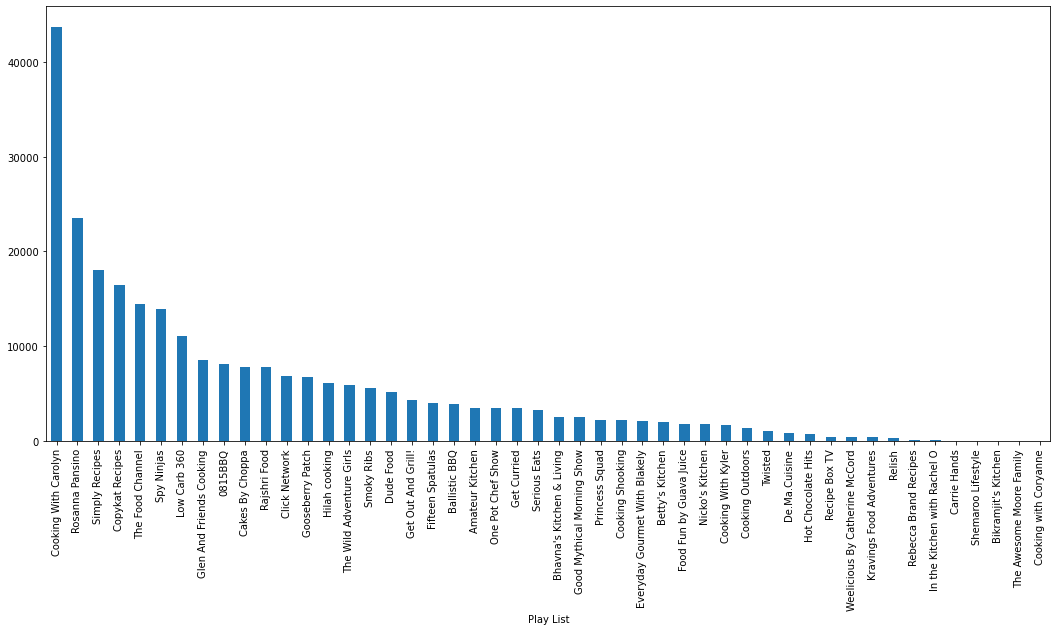

In [25]:
plt.figure(figsize=(18,8))
popular_food_shows["Watch Time"].groupby(df["Play List"]).mean().sort_values(ascending=False).plot(kind="bar")
#within popular food shows cooking with carolyn is the most watched show then Ronsana Pansino and so on..

### What other data points / information is needed to ensure that this data analysis can be optimised?

### Answer.
### 1.Views on any L2 Categories
### 2.User Ratings on any show
### 3. Demographic Information like gender,age,location,interest of user etc.
#behavior



